__7월 12일__

[학습 내용]
1. 지난 시간 내용을 리뷰를 통해 기본을 다진다.
    - 지난 시간 복습

2. 팀별 개인별 자료 정리 및 마무리 시간을 갖는다.
    - 개인별 Github 정리
    - 개인별 Notion 정리
    
3. dacon 대회에 참여를 해 본다.
    - 계정을 만들기
    - 데이터 다운로드 및 데이터 살펴보기
    - 기본 모델 만들고 제출해 보기
4. 데이터 전처리 수행 및 모델 개선
5. 개별 면담(수업 후, 10분 2명)

In [21]:
import pandas as pd
import os
import seaborn as sns

In [8]:
in_path = './235745_parking_data/'
train = pd.read_csv(in_path+'train.csv')
test = pd.read_csv(in_path+"test.csv")
sub = pd.read_csv(in_path+"sample_submission.csv")
age = pd.read_csv(in_path+"age_gender_info.csv")

train.shape, test.shape, sub.shape, age.shape

((2952, 15), (1022, 14), (150, 2), (16, 23))

In [16]:
train.head()
# train.info()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
0,C2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
1,C2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
2,C2483,900,아파트,경상북도,국민임대,51.93,385,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
3,C2483,900,아파트,경상북도,국민임대,51.93,15,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
4,C2483,900,아파트,경상북도,국민임대,51.93,41,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0


In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2952 entries, 0 to 2951
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   단지코드                          2952 non-null   object 
 1   총세대수                          2952 non-null   int64  
 2   임대건물구분                        2952 non-null   object 
 3   지역                            2952 non-null   object 
 4   공급유형                          2952 non-null   object 
 5   전용면적                          2952 non-null   float64
 6   전용면적별세대수                      2952 non-null   int64  
 7   공가수                           2952 non-null   float64
 8   자격유형                          2952 non-null   object 
 9   임대보증금                         2383 non-null   object 
 10  임대료                           2383 non-null   object 
 11  도보 10분거리 내 지하철역 수(환승노선 수 반영)  2741 non-null   float64
 12  도보 10분거리 내 버스정류장 수            2948 non-null   float64
 13  단지내

In [17]:
train.columns

Index(['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '도보 10분거리 내 지하철역 수(환승노선 수 반영)',
       '도보 10분거리 내 버스정류장 수', '단지내주차면수', '등록차량수'],
      dtype='object')

In [20]:
col_cat = ['임대건물구분', '지역', '공급유형','자격유형','도보 10분거리 내 지하철역 수(환승노선 수 반영)',
       '도보 10분거리 내 버스정류장 수']
for col in col_cat :
    print(col, train[col].unique(), sep='\n')

임대건물구분
['아파트' '상가']
지역
['경상북도' '경상남도' '대전광역시' '경기도' '전라북도' '강원도' '광주광역시' '충청남도' '부산광역시' '제주특별자치도'
 '울산광역시' '충청북도' '전라남도' '대구광역시' '서울특별시' '세종특별자치시']
공급유형
['국민임대' '공공임대(50년)' '영구임대' '임대상가' '공공임대(10년)' '공공임대(분납)' '장기전세' '공공분양'
 '행복주택' '공공임대(5년)']
자격유형
['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O']
도보 10분거리 내 지하철역 수(환승노선 수 반영)
[ 0.  1. nan  2.  3.]
도보 10분거리 내 버스정류장 수
[ 3.  1.  2.  6. 10.  5.  4.  7. 12. 14.  8.  0. 20. 11. 16. 15. nan 19.]


In [39]:
grp_sum = train.groupby("지역").sum().loc[:,['총세대수','공가수',"등록차량수"]] 
grp_sum
# grp_avg = train.groupby("지역").mean().loc[:,[]]

,총세대수,공가수,등록차량수
지역,,,
강원도,102717,1681.0,72602.0
경기도,594150,8210.0,493561.0
경상남도,256693,4266.0,152854.0
경상북도,74987,2648.0,76258.0
광주광역시,109468,2406.0,103192.0
대구광역시,88012,1822.0,89099.0
대전광역시,342033,3043.0,142415.0
부산광역시,495631,4490.0,103827.0
서울특별시,49848,542.0,56469.0


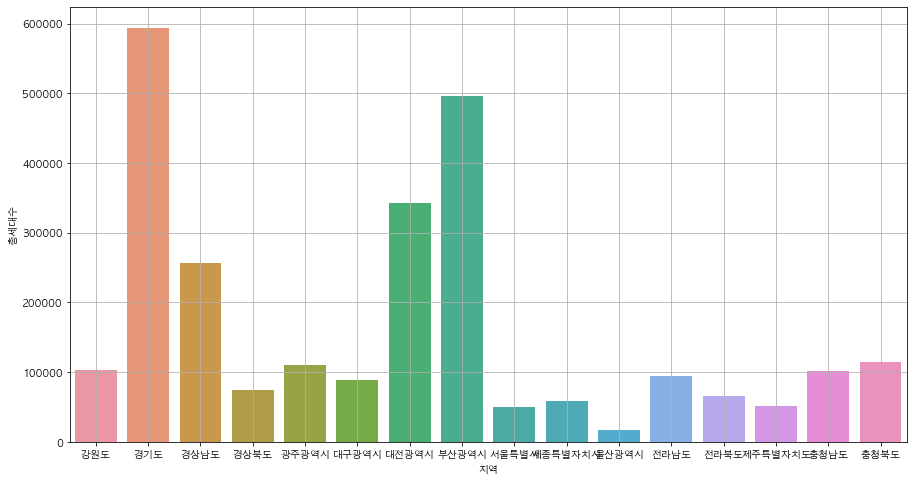

In [40]:
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='AppleGothic')

import warnings
warnings.filterwarnings(action='ignore')


plt.figure(figsize=(15,8))
sns.barplot(grp_sum.index, grp_sum["총세대수"])
plt.grid()